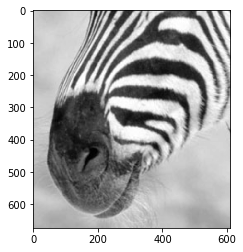

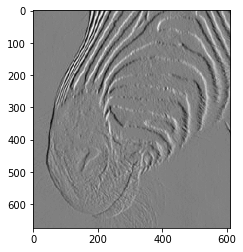

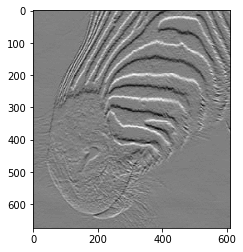

In [2]:
# 2A-L5 23
import cv2
from matplotlib import pyplot as plt
import numpy as np

zebra = cv2.imread('images/zebra.png',0).astype('float64') # float64: p/ permitir negativos e frações
plt.imshow(zebra,'gray'); plt.show()

h = np.array([[0,0,0],[0, -1, 1],[0,0,0]]) # eixo x, right derivative
r = cv2.filter2D(zebra,-1,h)
plt.imshow(r,'gray'); plt.show()

h = np.array([[0,0,0],[0, -1, 0],[0,1,0]]) # eixo y
r = cv2.filter2D(zebra,-1,h)
plt.imshow(r,'gray'); plt.show()

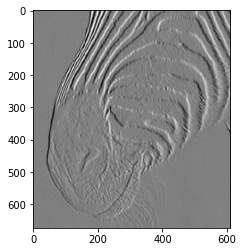

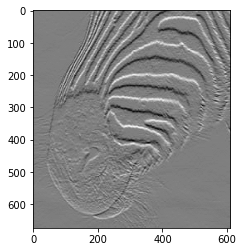

In [3]:
# 2A-L5 25 simétricos
h = np.array([[0,0,0],[-.5, 0, .5],[0,0,0]])
r = cv2.filter2D(zebra,-1,h)
plt.imshow(r,'gray'); plt.show()

h = np.array([[0,-.5,0],[0, 0, 0],[0,.5,0]])
r = cv2.filter2D(zebra,-1,h)
plt.imshow(r,'gray'); plt.show()

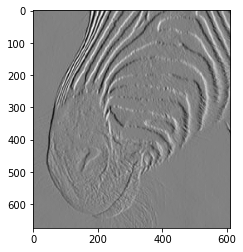

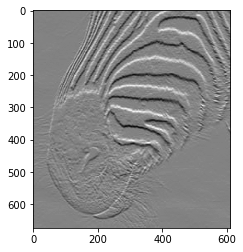

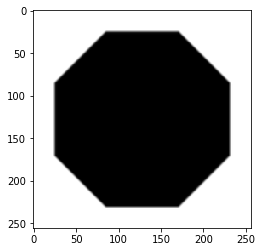

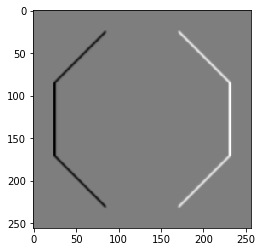

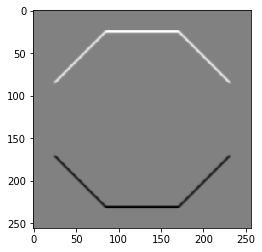

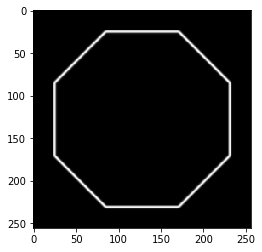

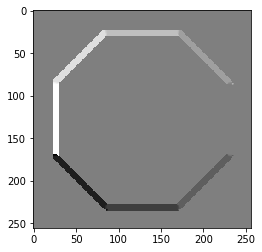

In [5]:
# 2A-L5 26 sobel
sx = np.array([[-1,0,1],[-2, 0, 2],[-1,0,1]]) / 8
r = cv2.filter2D(zebra,-1,sx)
plt.imshow(r,'gray'); plt.show()

sy = np.array([[1,2,1],[0, 0, 0],[-1,-2,-1]]) / 8
r = cv2.filter2D(zebra,-1,sy)
plt.imshow(r,'gray'); plt.show()

#########

octagon = cv2.imread('images/octagon.png',0).astype('float64')
plt.imshow(octagon,'gray'); plt.show()

gx = cv2.filter2D(octagon,-1,sx)
plt.imshow(gx,'gray'); plt.show()

gy = cv2.filter2D(octagon,-1,sy)
plt.imshow(gy,'gray'); plt.show()

g = np.sqrt(gx**2 + gy**2)
plt.imshow(g,'gray'); plt.show()

theta = np.arctan2(gy,gx)
plt.imshow(theta,'gray'); plt.show()

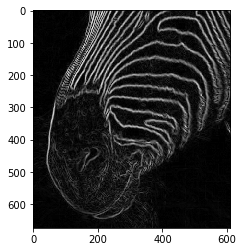

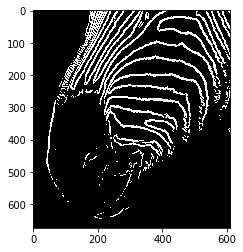

In [130]:
# 2A-L5 25 - Sobel em imagens reais, threshold
gx = cv2.filter2D(zebra,-1,sx)
gy = cv2.filter2D(zebra,-1,sy)
g = np.sqrt(gx**2 + gy**2)
plt.imshow(g,'gray'); plt.show()

r,g = cv2.threshold(g, 0.3*np.max(g), 255, cv2.THRESH_BINARY)
plt.imshow(g,'gray'); plt.show()

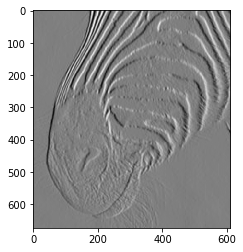

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[ -1.  -2.   0.   2.   1.]
 [ -4.  -8.   0.   8.   4.]
 [ -6. -12.   0.  12.   6.]
 [ -4.  -8.   0.   8.   4.]
 [ -1.  -2.   0.   2.   1.]]
[[  -1.   -4.   -5.    0.    5.    4.    1.]
 [  -6.  -24.  -30.    0.   30.   24.    6.]
 [ -15.  -60.  -75.    0.   75.   60.   15.]
 [ -20.  -80. -100.    0.  100.   80.   20.]
 [ -15.  -60.  -75.    0.   75.   60.   15.]
 [  -6.  -24.  -30.    0.   30.   24.    6.]
 [  -1.   -4.   -5.    0.    5.    4.    1.]]
[[-1.0000e+00 -8.0000e+00 -2.7000e+01 -4.8000e+01 -4.2000e+01  0.0000e+00
   4.2000e+01  4.8000e+01  2.7000e+01  8.0000e+00  1.0000e+00]
 [-1.0000e+01 -8.0000e+01 -2.7000e+02 -4.8000e+02 -4.2000e+02  0.0000e+00
   4.2000e+02  4.8000e+02  2.7000e+02  8.0000e+01  1.0000e+01]
 [-4.5000e+01 -3.6000e+02 -1.2150e+03 -2.1600e+03 -1.8900e+03  0.0000e+00
   1.8900e+03  2.1600e+03  1.2150e+03  3.6000e+02  4.5000e+01]
 [-1.2000e+02 -9.6000e+02 -3.2400e+03 -5.7600e+03 -5.0400e+03  0.0000e+00
   5.0400e+0

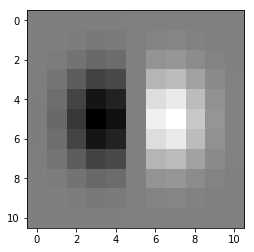

In [7]:
# 2A-L5 29: Sobel implementado no opencv

#                              dx dy
r = cv2.Sobel(zebra,cv2.CV_64F, 1, 0,ksize=5) # CV_64F permite representar derivadas negativas
                                              # dx,dy indicam quandas vezes derivar em cada eixo
plt.imshow(r,'gray'); plt.show()

# descobrir filtro aplicado: imagem = impulso
for n in [3,5,7,11]:
    impulse = np.zeros((n,n)); impulse[n//2,n//2]=1
    r = cv2.Sobel(impulse, cv2.CV_64F, 1, 0, ksize=n, borderType=cv2.BORDER_CONSTANT)
    r = cv2.flip(r,-1) # flip: 'Sobel' realiza convolução
    print(r)
plt.imshow(r,'gray'); plt.show() # exibir com kernel size = 11

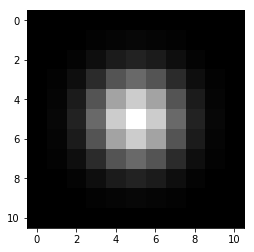

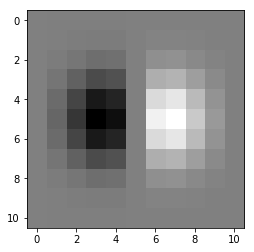

[[ 0.00000000e+00 -1.79824557e-05 -5.23249718e-05 -9.10140879e-05
  -8.05484025e-05  0.00000000e+00  8.05484025e-05  9.10140879e-05
   5.23249718e-05  1.79824557e-05  0.00000000e+00]
 [ 0.00000000e+00 -1.32873374e-04 -3.86632152e-04 -6.72508201e-04
  -5.95176665e-04  0.00000000e+00  5.95176665e-04  6.72508201e-04
   3.86632152e-04  1.32873374e-04  0.00000000e+00]
 [ 0.00000000e+00 -6.29516558e-04 -1.83175405e-03 -3.18615412e-03
  -2.81977911e-03  0.00000000e+00  2.81977911e-03  3.18615412e-03
   1.83175405e-03  6.29516558e-04  0.00000000e+00]
 [ 0.00000000e+00 -1.91230245e-03 -5.56437749e-03 -9.67868161e-03
  -8.56573262e-03  0.00000000e+00  8.56573262e-03  9.67868161e-03
   5.56437749e-03  1.91230245e-03  0.00000000e+00]
 [ 0.00000000e+00 -3.72465659e-03 -1.08379275e-02 -1.88514976e-02
  -1.66837690e-02  0.00000000e+00  1.66837690e-02  1.88514976e-02
   1.08379275e-02  3.72465659e-03  0.00000000e+00]
 [ 0.00000000e+00 -4.65153317e-03 -1.35349334e-02 -2.35426715e-02
  -2.08355061e-02  

In [8]:
# Como o Sobel é calculado: derivada direcional na distribuição normal
h1D = cv2.getGaussianKernel(11, 1.5) # sigma=1.5 obtido empiricamente
gauss = np.outer(h1D,h1D)
plt.imshow(gauss, 'gray'); plt.show()

h = np.array([[0,0,0],[-.5, 0, .5],[0,0,0]])
r = cv2.filter2D(gauss,-1,h)
r = cv2.flip(r,-1)
plt.imshow(r,'gray'); plt.show() # necessário apenas fazer correção de escala
print(r)

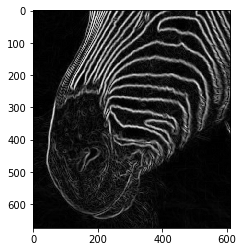

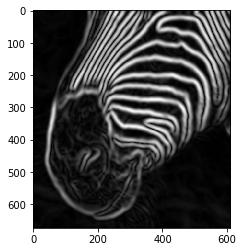

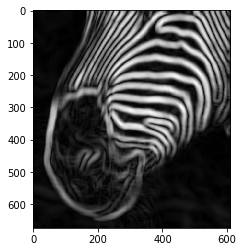

In [9]:
# 2A-L6 11: efeito do sigma (suavização) nas derivadas

sx = np.array([[0,0,0],[-.5, 0, .5],[0,0,0]])
sy = np.array([[0,-.5,0],[0, 0, 0],[0,.5,0]])

for sigma in [1,5,15]:
    img = cv2.GaussianBlur(zebra, (21,21), sigma)
    gx = cv2.filter2D(img,-1,sx)
    gy = cv2.filter2D(img,-1,sy)
    g = np.sqrt(gx**2 + gy**2)
    plt.imshow(g,'gray'); plt.show()

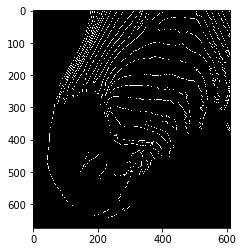

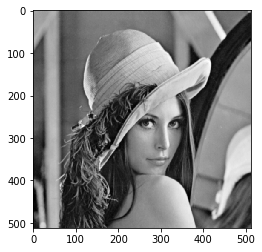

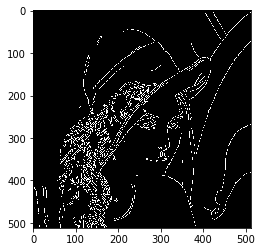

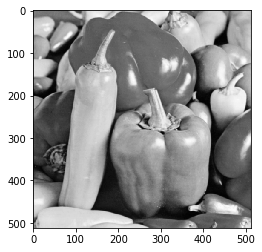

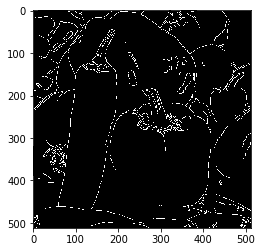

In [243]:
# 2A-L6 13: Canny

img = cv2.GaussianBlur(zebra, (3,3), 0).astype('uint8')
r = cv2.Canny(img,85,170) # parâmetros: threshold min e max
plt.imshow(r,'gray'); plt.show()

lena = cv2.imread('images/lena.png',0)
lena = cv2.GaussianBlur(lena, (3,3), 0)
plt.imshow(lena,'gray'); plt.show()
r = cv2.Canny(lena,85,170) # parâmetros: threshold min e max
plt.imshow(r,'gray'); plt.show()

peppers = cv2.imread('images/peppers.png',0)
peppers = cv2.GaussianBlur(peppers, (3,3), 0)
plt.imshow(peppers,'gray'); plt.show()
r = cv2.Canny(peppers,90,160) # parâmetros: threshold min e max
plt.imshow(r,'gray'); plt.show()

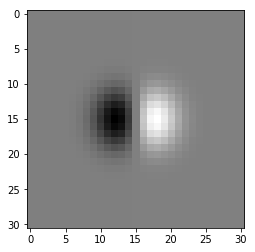

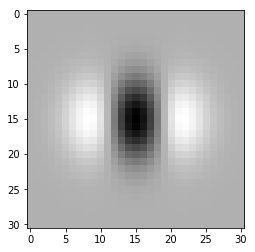

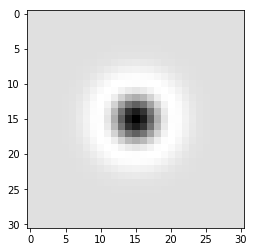

In [226]:
# 2A-L6 29: Laplaciano

n = 31
impulse = np.zeros((n,n)); impulse[n//2,n//2]=1

# Sobel no eixo x: derivada da gaussiana
r = cv2.Sobel(impulse, cv2.CV_64F, 1, 0, ksize=n, borderType=cv2.BORDER_CONSTANT)
plt.imshow(cv2.flip(r,-1),'gray'); plt.show()

# Sobel novamente no eixo x
rr = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=n, borderType=cv2.BORDER_CONSTANT)
plt.imshow(cv2.flip(rr,-1),'gray'); plt.show()

# Laplaciano: chapéu mexicano invertido em todas as direções
# dG^2/dx^2 + dG^2/dy^2 correto quando a derivada 2a é nula em um dos eixos
laplacian = cv2.Laplacian(impulse,cv2.CV_64F,ksize=n)
plt.imshow(laplacian,'gray'); plt.show()

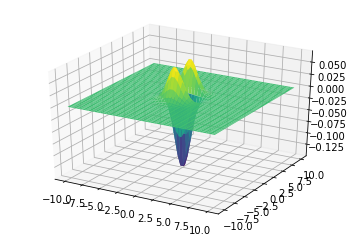

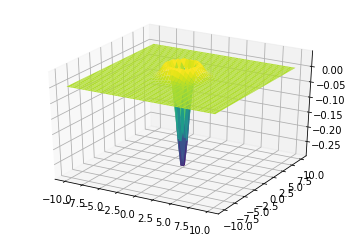

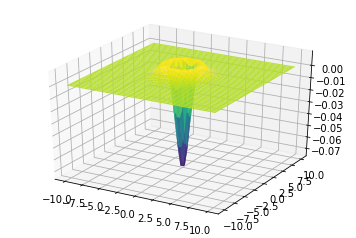

In [230]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
G = sympy.exp(-(x**2 + y**2)/2) / (2 * sympy.pi)

dxx = sympy.diff(G,x,2) # derivada 2a da gaussiana em x
dyy = sympy.diff(G,y,2) # derivada 2a da gaussiana em y
sympy.plotting.plot3d(dyy)

laplaciano = dxx + dyy
sympy.plotting.plot3d(laplaciano)

# Aproximação usando diferença de gaussianas (sigma^2 = 1 e sigma^2 = 2)
G2 = sympy.exp(-(x**2 + y**2)/4) / (4 * sympy.pi)
sympy.plotting.plot3d(G2 - G)

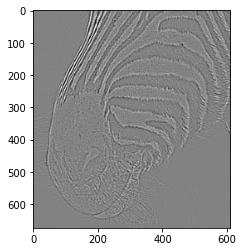

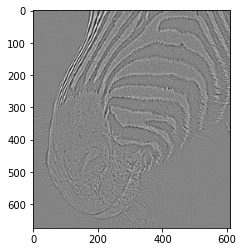

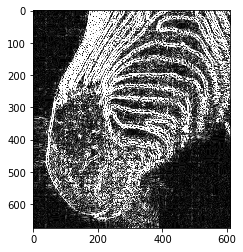

In [234]:
# Laplaciando em imagens reais

# Aproximação usando diferença de gaussianas (ksize = 5x5 e 3x3)
g1 = cv2.GaussianBlur(zebra, (5,5), 0)
g2 = cv2.GaussianBlur(zebra, (3,3), 0)
laplacian = g1 - g2
plt.imshow(laplacian,'gray'); plt.show()

# Usando operador implementado no opencv: dG^2/dx^2 + dG^2/dy^2
laplacian = cv2.Laplacian(zebra,cv2.CV_64F,ksize=5)
plt.imshow(laplacian,'gray'); plt.show()

# Tirando o módulo e truncando p/ uint8 ([0,255]). O mesmo que np.abs(laplacian).clip(0,255).astype('uint8')
laplacian = cv2.convertScaleAbs(laplacian)
#r,laplacian = cv2.threshold(np.abs(laplacian), 254, 255, cv2.THRESH_BINARY)
plt.imshow(laplacian,'gray'); plt.show()

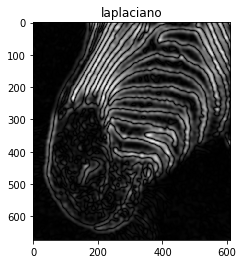

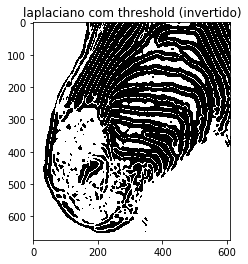

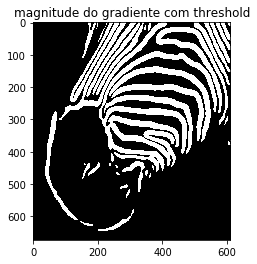

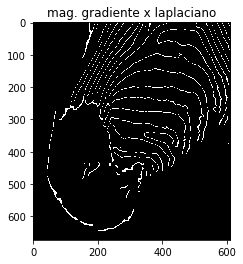

In [260]:
# Aplicando filtro gaussiano antes de aplicar o laplaciano
img = cv2.GaussianBlur(zebra, (31,31), 0)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=5)
laplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian,'gray'); plt.title('laplaciano'); plt.show()

# Threashold: 0 p/ intensidade abaixo de 20, 255 p/ demais intensidades
r,laplacian = cv2.threshold(laplacian, 20, 255, cv2.THRESH_BINARY_INV)
plt.imshow(laplacian,'gray'); plt.title('laplaciano com threshold (invertido)'); plt.show()

# Determinar intensidade do gradiente em cada pixel
sx = np.array([[0,0,0],[-.5, 0, .5],[0,0,0]])
sy = np.array([[0,-.5,0],[0, 0, 0],[0,.5,0]])
gx = cv2.filter2D(img,-1,sx)
gy = cv2.filter2D(img,-1,sy)
g = np.sqrt(gx**2 + gy**2)
r,g = cv2.threshold(g, 0.3*np.max(g), 255, cv2.THRESH_BINARY)
plt.imshow(g,'gray'); plt.title('magnitude do gradiente com threshold'); plt.show()

plt.imshow(g * laplacian,'gray'); plt.title('mag. gradiente x laplaciano'); plt.show()